# 🛒 **연관 분석 (Association Rule Analysis) 실습**

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이번 시간엔 장바구니 분석이라고도 불리는 연관 분석 실습을 진행해볼게요! <strong>
</span>


- **연관 분석**: 상품이나 서비스를 구매하는 등 일련의 거래나 사건 안에 존재하는 항목 간의 일정한 연관 규칙을 발견하는 분석

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 분석에 앞서 mlxtend 라이브러리 설치가 필요합니다! <strong>
</span>

### <span style="color:purple"> <strong> 0. mlxtend 라이브러리 설치 <strong> </span>

- `mlxtend`(machine learning extensions)는 Python에서 머신러닝과 데이터 분석을 더 쉽게 할 수 있도록 도와주는 확장 라이브러리 
- `scikit-learn`과 호환되며, Apriori, Association Rules 같은 기능 제공 ➡️  **연관 분석 (Association Rule Mining)** 할 때 자주 사용


In [2]:
!pip install --upgrade pip
!pip install mlxtend

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 10.7 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 10.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.4/1.8 MB 11.1 MB/s eta 0:00:01
   -------------------------------------- - 1.7/1.8 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.8 MB

ERROR: To modify pip, please run the following command:
C:\Users\김숙경\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 5.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 3.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 1.2/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤔 그냥 'scikit-learn' 쓰면 안되나요? <strong>
</span> 

- 사이킷런에서도 인코딩이 가능하긴 하지만 "고정된 열 구조"가 있는 2D 테이블형 데이터에서만 적용 가능 
- 장바구니 분석에서 주로 등장하는 리스트-오브-리스트 형태의 데이터셋에서는 적용하기 어려운 부분이 있음

    ex)   
    [['milk'], ['bread']] => ✅ 가능  
    [['milk', 'bread'], ['bread', 'butter']] => ❌ 불가능 (리스트 안의 길이가 가변)

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 패키지 다운이 완료되었다면 먼저 Apriori 알고리즘을 활용한 연관 분석 실습을 진행해보도록 하겠습니다! <strong>
</span>

## **1. 실습 ① : Apriori 알고리즘을 활용한 연관 분석 실습**

### <span style="color:orange"> <strong> 1-1. 트랜잭션 데이터를 연관 규칙 분석이 가능한 이진(True/False) 행렬로 변환하기 <strong> </span>

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 트랜잭션 데이터란 ?!<strong>
</span>

- 한 명의 고객이 한 번의 구매 행위(장바구니)에서 선택한 상품 목록을 기록한 데이터

  → 연관 규칙 분석에서는 이 데이터를 기반으로 어떤 상품들이 함께 자주 구매되는지 파악

예시) 트랜잭션 데이터 → 각 리스트 하나는 하나의 **트랜잭션(장바구니)**</span>에 해당 / 고객이 해당 거래에서 어떤 상품을 샀는지 나열된 구조

```python
dataset = [
    ['Apple', 'Beer', 'Rice'],
    ['Apple', 'Beer'],
    ['Apple', 'Bananas'],
    ['Milk', 'Beer', 'Rice'],
    ['Milk', 'Beer']
]
```

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 Apriori 알고리즘에 해당 데이터를 입력하기 위해선 데이터를 아래처럼 이진(True/False) 행렬 형식으로 변환하는 과정이 필요합니다!<strong>
</span>

변환 후)
| Apple | Bananas | Beer  | Milk  | Rice  |
| ----- | ------- | ----- | ----- | ----- |
| True  | False   | True  | False | True  |
| True  | False   | True  | False | False |
| True  | True    | False | False | False |
| False | False   | True  | True  | True  |
| False | False   | True  | True  | False |


<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤔 왜요?? 그냥 리스트로 입력하면 안되나요????? <strong>
</span>

- 리스트 형태의 트랜잭션은 사람이 보기엔 이해하기 쉽지만, 알고리즘은 **모든 거래를 동일한 기준(전체 상품 목록)**</span>에서 비교해야 함

- 따라서 `TransactionEncoder`를 사용하여 **모든 거래를 하나의 기준 열(상품 리스트)로 통일**한 **이진 매트릭스 형식**으로 바꿔야 함

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 코드를 통해 트랜잭션 데이터를 이진(True/False) 행렬로 변환해봅시다! <strong>
</span>

In [3]:
import pandas as pd

# TransactionEncoder: 트랜잭션 데이터를 이진 벡터(True/False)로 변환해주는 도구
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# 장바구니 데이터 (트랜잭션 데이터)
# 각 리스트는 하나의 거래(고객의 장바구니)에 해당하며, 고객이 구매한 상품을 나열함
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],     # 사과, 맥주, 쌀, 치킨을 산 장바구니
            ['Apple', 'Beer', 'Rice'],               # 사과, 맥주, 쌀을 산 장바구니
            ['Apple', 'Beer'],                       # 사과, 맥주를 산 장바구니
            ['Apple', 'Bananas'],                    # 사과, 바나나를 산 장바구니
            ['Milk', 'Beer', 'Rice', 'Chicken'],     # 우유, 맥주, 쌀, 치킨을 산 장바구니
            ['Milk', 'Beer', 'Rice'],                # 우유, 맥주, 쌀을 산 장바구니
            ['Milk', 'Beer'],                        # 우유, 맥주를 산 장바구니
            ['Apple', 'Bananas']]                    # 사과, 바나나를 산 장바구니

# TransactionEncoder 객체 생성
te = TransactionEncoder()

# fit(): 고유 상품 리스트를 학습(데이터에 등장하는 전체 항목을 학습)
# transform(): 각 트랜잭션을 상품 포함 여부에 따라 True/False로 변환
te_ary = te.fit(dataset).transform(dataset)

# 결과는 True/False 값으로 구성된 2차원 배열 (이진 행렬)
te_ary

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

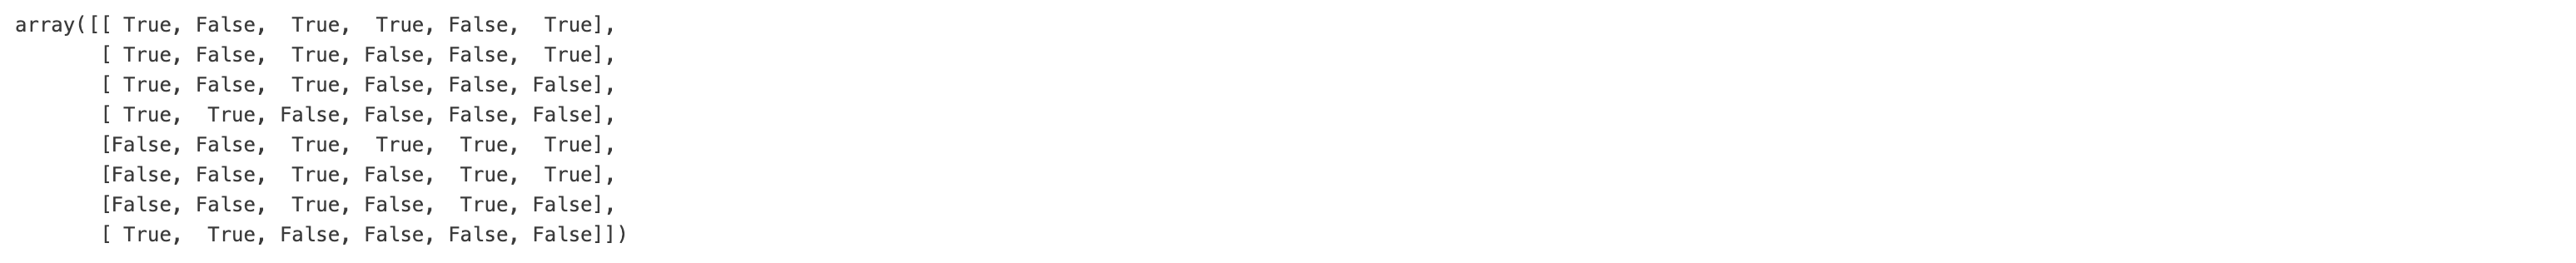

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤔 근데 fit(), transform() 대신 fit()만 쓰거나 fit_transform()을 쓰면 안되나요? <strong>
</span>

| 함수                | 주요 역할               |
| ----------------- | ------------------- |
| `fit()`           | 전체 데이터에 등장하는 고유 아이템 목록을 학습 (열 이름 결정)  |
| `transform()`     | 학습한 구조에 따라 트랜잭션을 True/False 형식의 이진 벡터로 변환 |
| `fit_transform()` | 학습과 변환을 동시에 수행      |

고유 항목 추출(fit)과 데이터 변환(transform)은 `fit_transform()`을 통해 한번에 학습과 변환을 시킬 수 있지만, \
학습 데이터로 `fit()`을 하고 다른 데이터셋에 `transform()`을 적용할 때, 동일한 열 구조 유지하여 분석의 일관성을 보장하고자 분리해 사용 

In [5]:
# 전체 트랜잭션에서 등장한 고유 상품 목록 (열 이름 순서로 사용됨)
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [6]:
# 트랜잭션 데이터를 True/False 이진 행렬로 변환한 결과 (2차원 배열)
te_ary

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [7]:
# 원래 데이터셋 확인
dataset

[['Apple', 'Beer', 'Rice', 'Chicken'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Milk', 'Beer', 'Rice', 'Chicken'],
 ['Milk', 'Beer', 'Rice'],
 ['Milk', 'Beer'],
 ['Apple', 'Bananas']]

|Apple|Bananas|Beer|Chicken|Milk|Rice|
|---|---|---|---|---|---|
|O|X|O|O|X|O|
|O|X|O|X|X|O|
|O|X|O|X|X|X|
|O|O|X|X|X|X|
|X|X|O|O|O|O|
|X|X|O|X|O|O|
|X|X|O|X|O|X|
|O|O|X|X|X|X|

원래 데이터셋이 이진 행렬로 잘 변환 된 것을 알 수 있습니다!

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 만들어진 이진 행렬을 분석용 데이터 프레임으로 만들어봅시다! <strong>
</span>

### <span style="color:orange"> <strong> 1-2. 인코딩된 결과로 분석용 데이터프레임 구성하기 <strong> </span>

- `TransactionEncoder`로 변환한 결과(te_ary)는 `numpy` 배열 형태임

- `numpy` 배열을 `pd.DataFrame`으로 구성하여 연관 분석 알고리즘 입력 형식으로 활용

- DataFrame으로 변환하면 행은 트랜잭션(장바구니), 열은 상품을 의미

- astype('int')는 True/False 값을 보기 쉽게 1/0으로 바꾸는 작업임 (분석에는 영향 없음)


In [8]:
# True/False 형식의 이진 배열을 DataFrame으로 변환
# 각 행은 하나의 트랜잭션(장바구니), 각 열은 상품 이름
# True → 1, False → 0 으로 변환하여 보기 쉽게 표시 (계산에는 영향 없음)
df = pd.DataFrame(te_ary.astype('int'), columns=te.columns_)

# 변환된 데이터프레임 출력
# 인덱스: 각 거래(장바구니), 열: 상품 
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,1,0,1,1,0,1
1,1,0,1,0,0,1
2,1,0,1,0,0,0
3,1,1,0,0,0,0
4,0,0,1,1,1,1
5,0,0,1,0,1,1
6,0,0,1,0,1,0
7,1,1,0,0,0,0


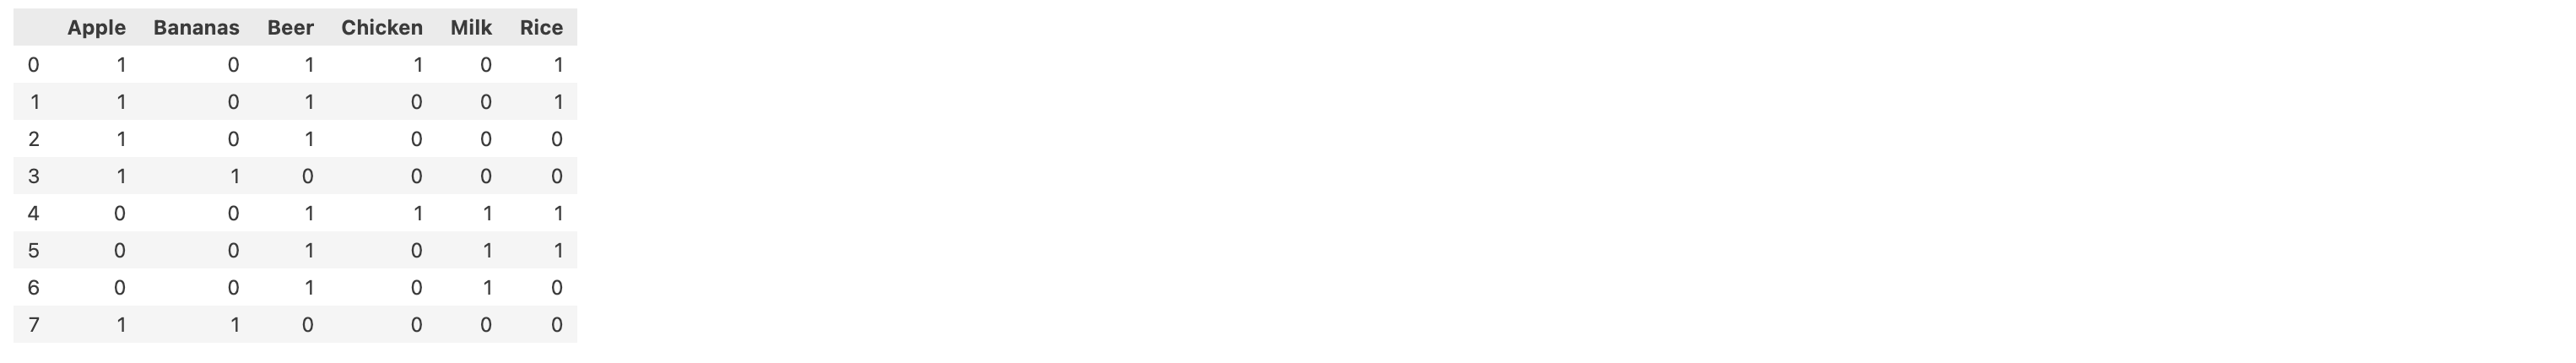

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 이제 연관 분석을 위한 전처리는 모두 완료되었습니다! 이제 분석을 시작해볼까요~?  <strong>
</span>

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 잠깐! 분석에 앞서 지지도, 신뢰도, 향상도의 개념을 다시 한 번 짚고 넘어갑시다!  <strong>
</span>

### <span style="color:purple"> <strong> 🟣 지지도, 신뢰도, 향상도 <strong> </span>

- `apriori()`와 `association_rules()`를 사용하여 연관 규칙을 도출하고, 핵심 지표인 **지지도(support), 신뢰도(confidence), 향상도(lift)** 를 확인함

| 지표       | 정의                                    | 수식                                 | 해석                                  |
|----------------|-------------------------|--------------------------------------|---------------------------------------|
| 지지도 (Support)     | A와 B가 동시에 등장한 비율              | P(A ∩ B)                             | 얼마나 자주 함께 팔리는 조합인지     |
| 신뢰도 (Confidence)     | A를 구매한 거래 중 B도 함께 산 비율     | P(B \| A) = P(A ∩ B) / P(A)          | A를 샀을 때 B를 추천할 신뢰 수준              |
| 향상도 (Lift)     | B가 일반적으로 발생하는 빈도에 비해 A가 있을 때 얼마나 더 자주 발생하는지  | P(B \| A) / P(B) = Confidence(A→B) / Support(B)               | 연관성이 통계적으로 유의미한지 판단 |


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 이젠 진짜로!!! Apriori 알고리즘을 활용해 장바구니 분석을 해봅시다~  <strong>
</span>

### <span style="color:orange"> <strong> 1-3. 지지도를 기준으로 빈발 항목 집합 추출 및 정렬 <strong> </span>

#### ✅ **지지도 (Support)**
- 정의: 전체 거래 중에서 A와 B가 동시에 등장한 비율

- 수식: Support
(𝐴,𝐵) = 𝑃(𝐴∩𝐵)

- 예시: 총 100건의 거래 중 20건에서 Apple과 Beer가 함께 구매됨 → support = 20 / 100 = 0.2

- 해석: 지지도는 얼마나 자주 해당 조합이 등장했는지를 나타냄
    → 자주 등장할수록 의미있는 조합일 가능성이 높음
    → 너무 낮으면 우연히 생긴 조합일 가능성이 있음

#### ✅ **빈발 항목 집합 추출**

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 먼저 자주 함께 구매된 조합을 파악하기 위해 지지도가 일정 수준(0.3) 이상인 항목 집합 추출해봅시다!  <strong>
</span>


- `Apriori` 알고리즘을 이용해 **지지도 기준(min_support)** 을 충족하는 **빈발 항목 집합(Frequent Itemsets)** 을 도출함

In [11]:
from mlxtend.frequent_patterns import apriori

# 지지도 0.3 이상인 품목 조합만 추출
# min_support: 지지도의 최소 기준 (default는 0.5, 여기선 0.3으로 설정)
frequent_itemsets=apriori(df, min_support=0.3)

c:\Users\김숙경\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


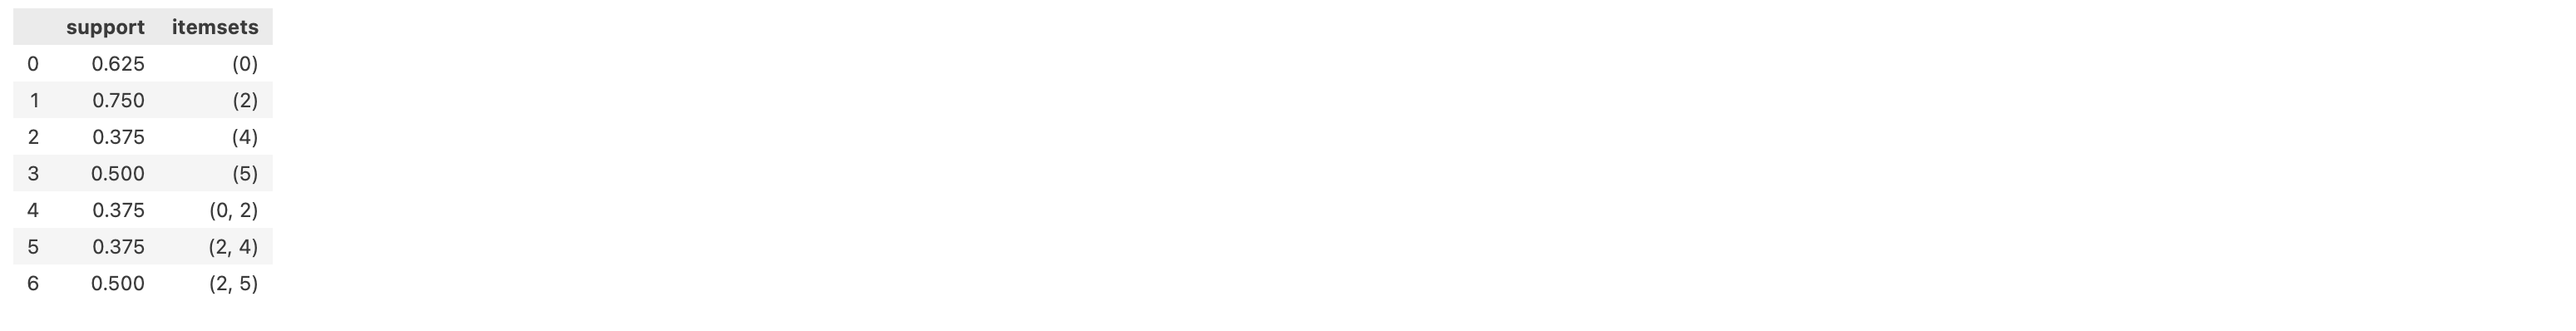

#### ✅ **빈발 항목 집합 정렬**
<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 자주 함께 구매된 조합부터 우선 확인하기 위해, 추출된 항목 집합을 지지도 기준으로 내림차순 정렬해봅시다!  <strong>
</span>

- 이후 support 값 기준으로 내림차순 정렬하여 가장 자주 등장한 조합부터 확인

In [12]:
# 지지도 0.3 이상인 품목 조합만 추출하고, 컬럼명을 항목명으로 표시
# use_colnames=True: itemsets 열에 항목 이름을 표시함 (True가 아니면 숫자 인덱스가 나옴)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# 지지도(support) 기준으로 내림차순 정렬
# 가장 자주 등장한 조합을 위쪽에서 확인할 수 있도록 정렬함
# inplace=False이므로 원본을 바꾸지는 않고 일시적으로만 정렬
frequent_itemsets.sort_values(by='support', ascending=False)

c:\Users\김숙경\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.750,(Beer)
0,0.625,(Apple)
3,0.500,(Rice)
6,0.500,"(Rice, Beer)"
2,0.375,(Milk)
4,0.375,"(Apple, Beer)"
5,0.375,"(Milk, Beer)"


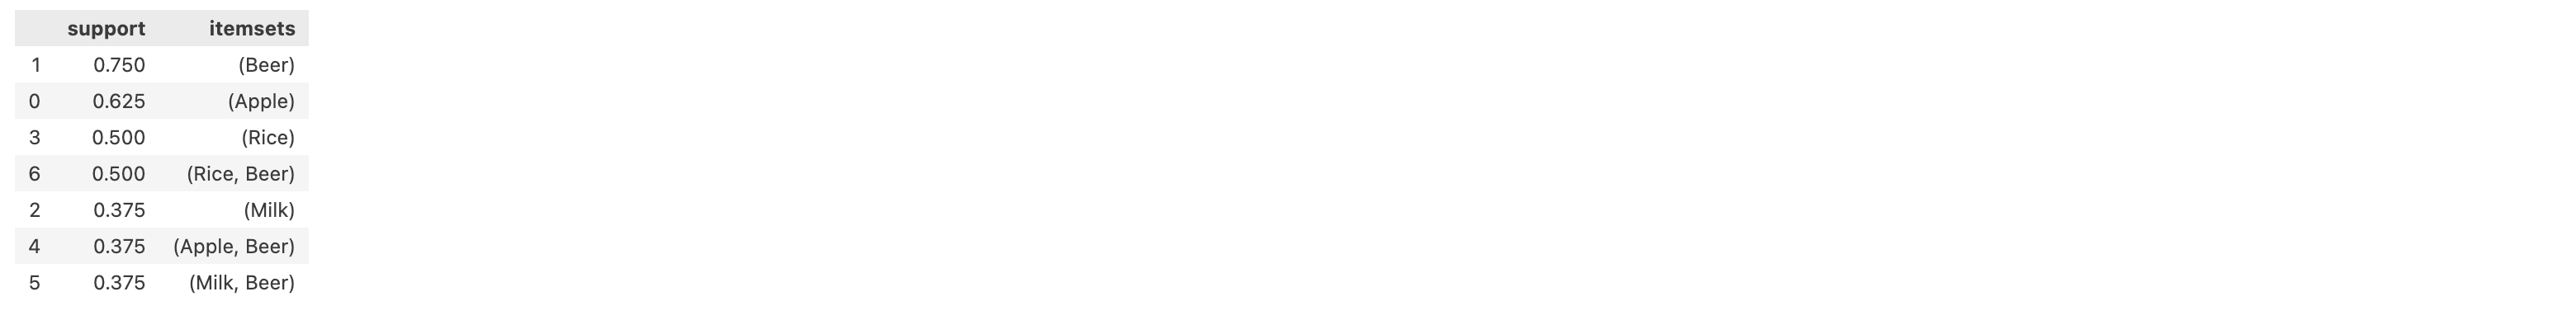

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 이제 A를 샀을 때, B도 함께 구매한 비율을 확인해보기 위해 신뢰도를 계산해봅시다!  <strong>
</span>

### <span style="color:orange"> <strong> 1-4. 신뢰도 기반 연관 규칙 도출하기 <strong> </span>

#### ✅ **신뢰도 (Confidence)**

- **정의**: A를 구매한 거래 중에서 B도 함께 구매한 비율
→ 조건부 확률 $P(B|A)$를 의미함

- **수식**: $Confidence(A\rightarrow B) = \dfrac{P(A\cap B)}{P(A)}$
​
- **예시**: \
총 8건의 거래 중 Apple을 구매한 거래는 5건. \
그 중 3건에서 Beer도 함께 구매됨 \
  ➡️ confidence = 3 / 5 = 0.6 \
  ➡️ Apple을 구매한 고객 중 60%가 Beer도 함께 구매

- **해석**: 신뢰도는 "A를 샀을 때 B도 함께 구매할 확률"을 나타냄 \
    ➡️ 추천의 정확도를 판단하는 핵심 지표 \
    ➡️ 값이 클수록 추천의 신뢰성이 높다고 해석할 수 있음

- 이처럼 신뢰도가 높을수록 **“A를 구매한 고객에게 B를 추천했을 때 맞을 확률”** 이 높아짐 \
  ➡️ 추천 알고리즘, 진열 전략, 크로스셀링 전략 등에 활용 가능

#### ✅ **신뢰도 기반 연관 규칙 도출**

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 지지도 0.3 이상이었던 품목 조합을 빈발 집합으로 정의해두었었죠?!<strong>
</span>


\
<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
해당 빈발집합만을 가지고 신뢰도(0.6)를 기준으로 association_rules()를 활용해 다시 규칙을 필터링해봅시다!
</span>

In [13]:
from mlxtend.frequent_patterns import association_rules

# association_rules(): apriori로 추출한 frequent_itemsets(지지도 0.3 이상인 품목 조합만 추출)를 기반으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙을 필터링함
# min_threshold=0.6: 신뢰도가 0.6 이상인 규칙만 추출 (디폴트값은 confidence >= 0.8)
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# 결과 확인
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Apple),(Beer),0.625,0.75,0.375,0.600000,0.800000,1.0,-0.09375,0.625,-0.4,0.375000,-0.600000,0.550000
1,(Milk),(Beer),0.375,0.75,0.375,1.000000,1.333333,1.0,0.09375,inf,0.4,0.500000,1.000000,0.750000
2,(Rice),(Beer),0.500,0.75,0.500,1.000000,1.333333,1.0,0.12500,inf,0.5,0.666667,1.000000,0.833333
3,(Beer),(Rice),0.750,0.50,0.500,0.666667,1.333333,1.0,0.12500,1.500,1.0,0.666667,0.333333,0.833333


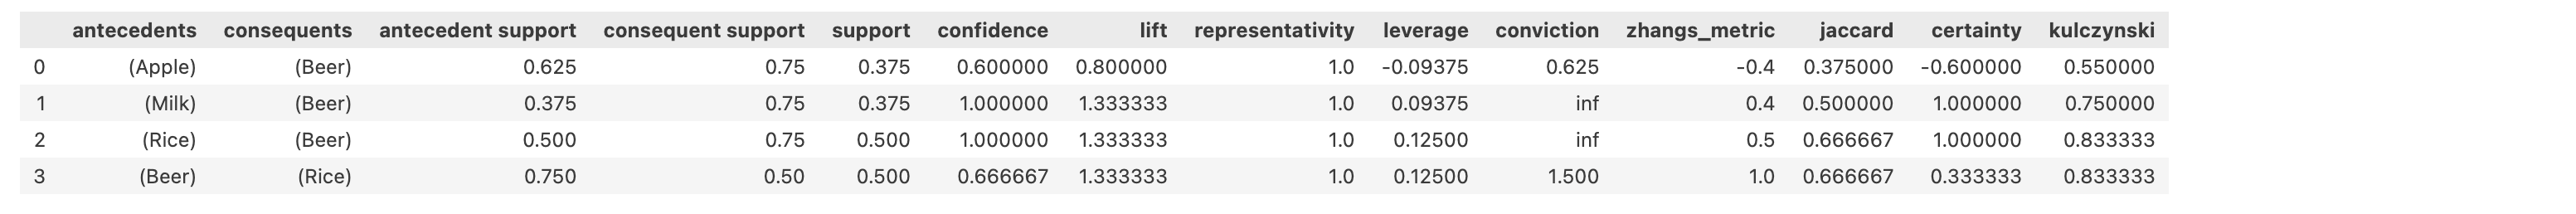

#### ✅ **주요 지표 해석**

| 지표명                                                   | 의미                              | 해석 방식                                    | 
| ----------------------------------------------------- | ------------------------------- | ---------------------------------------- | 
| `antecedents`                                         | 전제 조건 (A)                       | 규칙의 조건. 이 상품이 먼저 구매됨                     |                           
| `consequents`                                         | 결과 항목 (B)                       | 전제조건이 있을 때 연관되어 나타나는 상품                  |                           
| `antecedent support`                                  | A의 단독 등장 비율                     | 전체 거래 중 A가 등장한 비율 ($P(A)$)                 |                          
| `consequent support`                                  | B의 단독 등장 비율                     | 전체 거래 중 B가 등장한 비율 ($P(B)$)                 |                          
| `support`                                             | A와 B 동시 등장 비율                   | 전체 거래 중 A와 B가 함께 나타난 비율 ($P(A ∩ B)$)       |                         
| `confidence`                                          | A일 때 B도 살 확률                    | 조건부 확률 $P(B\| A) = P(A ∩ B) / P(A)$      |
| `lift`                                                | B의 일반적 확률 대비 A가 있을 때의 상승률       | $P(B\| A) / P(B)$, 1보다 크면 양의 연관관계 |
| `leverage`                                            | A, B가 독립일 때 기대보다 얼마나 더 함께 나타나는지 | $P(A ∩ B) − P(A) × P(B)$                   |                        
| `conviction`                                          | A가 있는데 B가 없을 확률의 역수             | $(1 − P(B)) / (1 − confidence)$, 클수록 강한 규칙 |                      
| `zhangs_metric`, `jaccard`, `certainty`, `kulczynski` | 다른 평가 지표들 (선택적 참고)              | 신뢰도·차이·균형 등을 복합적으로 반영                    | 


<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 "Apple을 구매한 고객에게 Beer를 추천할 수 있을까?"를 평가할 때, Apple을 샀을 때 Beer도 산 고객이 60%니까 어느 정도 신뢰할 수 있는 규칙이다!  <strong>
</span>

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 그러나 실제로 이 규칙이 유의미한지를 파악하기 위해선 향상도(lift)까지 확인해 판단해야해요! <strong>
</span>

### <span style="color:orange"> <strong> 1-5. 향상도 기반 유의미한 규칙 선별하기 <strong> </span>

#### ✅ **향상도 (Lift)**

- **정의**: B가 일반적으로 등장하는 빈도에 비해, A가 있을 때 B가 얼마나 더 자주 등장하는지를 나타내는 비율 \
    ➡️ 조건부 확률 $P(B|A)$를 B의 단독 확률 $P(B)$로 나눈 값

- **수식**: $Lift(A→B)=\dfrac{P(B|A)}{P(B)}$

- **예시**: 전체 거래 중 Beer의 등장 비율이 75%이고, Apple을 구매한 고객 중 60%가 Beer도 함께 구매 \
   ➡️ lift = $\dfrac{0.6}{0.75} = 0.8$

- **해석**: 향상도는 A와 B 사이의 연관성이 실제로 존재하는지(유의미한지)를 판단하는 지표
  - lift > 1: A가 있을 때 B의 등장 확률이 더 높아짐 (양의 연관관계)
  - lift = 1: 무관함 (독립적 관계)
  - lift < 1: A가 있을 때 B가 오히려 덜 나타남 (음의 연관관계)

- 향상도는 단순히 함께 자주 나타나는 것을 넘어, B가 본래 얼마나 잘 팔리는지를 고려한 **상대적 영향력**을 나타냄 \
  ➡️ **유의미한 추천 규칙인지 판단할 때 필수적인 보조 지표로 사용됨**

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 신뢰도가 0.6 이상인 것들만 추출한 데이터에서 향상도(1 이상)도 체크를 해볼까요? <strong>
</span>

In [17]:
# 향상도(lift)가 1.2 이상인 연관 규칙만 추출
# lift는 추천의 유의미한 연관성을 평가하는 지표로, 1보다 크면 양의 상관관계를 의미함
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# 추출된 연관 규칙 결과 출력
rules2 = rules2[rules2['confidence']>0.6] # association_rules()는 metric을 1개만 받을 수 있으므로 따로 처리를 해줘야 합니다.
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Milk),(Beer),0.375,0.75,0.375,1.000000,1.333333,1.0,0.09375,inf,0.4,0.500000,1.000000,0.750000
2,(Rice),(Beer),0.500,0.75,0.500,1.000000,1.333333,1.0,0.12500,inf,0.5,0.666667,1.000000,0.833333
3,(Beer),(Rice),0.750,0.50,0.500,0.666667,1.333333,1.0,0.12500,1.5,1.0,0.666667,0.333333,0.833333


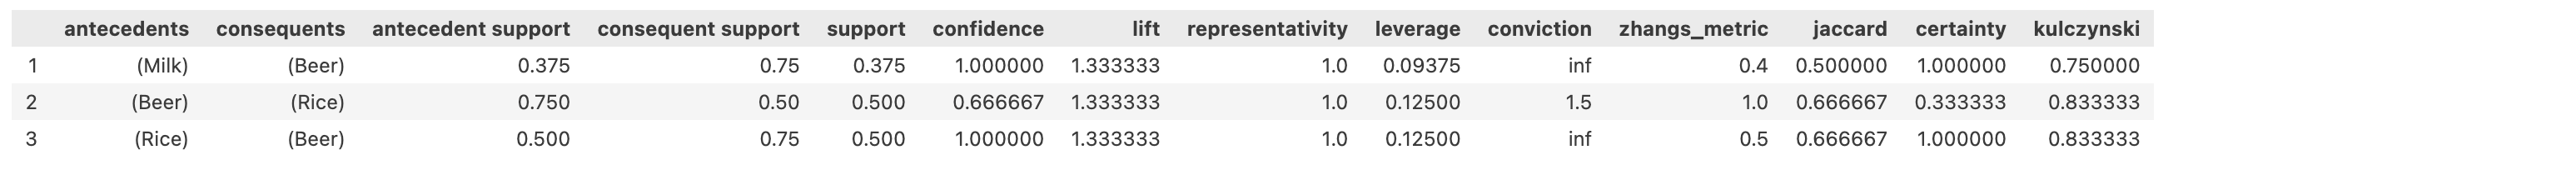

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 Milk를 구매한 고객은 전원 Beer도 함께 구매했으며, Beer가 Milk와 함께일 때 33% 더 자주 나타난다고 해석 가능!
→ 신뢰도와 향상도 모두 높아 연관 규칙으로 활용할 수 있다~ <strong>
</span>

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤓 이렇게 Apriori를 활용한 연관 분석은 끝! <strong>
</span>

<span style="color:black; background-color:#FFF099; padding:2px 4px; border-radius:4px">
<strong> 🤔 여기서 잠깐! 만약 apriori를 통해 빈발 아이템셋을 찾지 않고 계산한다면?!? <strong>
</span>

- 모든 가능한 아이템 조합에 대해 계산해야 합니다.
- 아이템이 $N$개면 가능한 조합의 수는 $2ⁿ - 1$ 개입니다 (공집합 제외)
- 계산량이 급증하고 매우 비효율적이겠죠? ㅡ ㅅ ㅡ

In [18]:
# 사실 이것도 min_support가 0인 경우는 포함되지 않아 완전한 전수조사는 아닙니다.
association_rules(apriori(df, min_support = 0.00001))

c:\Users\김숙경\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1),(0),0.250,0.625,0.250,1.0,1.600000,1.0,0.09375,inf,0.500000,0.400000,1.0,0.700000
1,(3),(2),0.250,0.750,0.250,1.0,1.333333,1.0,0.06250,inf,0.333333,0.333333,1.0,0.666667
2,(4),(2),0.375,0.750,0.375,1.0,1.333333,1.0,0.09375,inf,0.400000,0.500000,1.0,0.750000
3,(5),(2),0.500,0.750,0.500,1.0,1.333333,1.0,0.12500,inf,0.500000,0.666667,1.0,0.833333
4,(3),(5),0.250,0.500,0.250,1.0,2.000000,1.0,0.12500,inf,0.666667,0.500000,1.0,0.750000
5,"(0, 3)",(2),0.125,0.750,0.125,1.0,1.333333,1.0,0.03125,inf,0.285714,0.166667,1.0,0.583333
6,"(0, 5)",(2),0.250,0.750,0.250,1.0,1.333333,1.0,0.06250,inf,0.333333,0.333333,1.0,0.666667
7,"(0, 3)",(5),0.125,0.500,0.125,1.0,2.000000,1.0,0.06250,inf,0.571429,0.250000,1.0,0.625000
8,"(3, 4)",(2),0.125,0.750,0.125,1.0,1.333333,1.0,0.03125,inf,0.285714,0.166667,1.0,0.583333
9,"(2, 3)",(5),0.250,0.500,0.250,1.0,2.000000,1.0,0.12500,inf,0.666667,0.500000,1.0,0.750000


## **2. 실습 ② : Apriori 알고리즘과 FP-Growth 알고리즘 비교하기**

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 지금부턴 실제 고객 구매 데이터를 Apriori 알고리즘과 FP-Growth 알고리즘을 통해 연관 분석하는 실습을 해볼게요! <strong>
</span>

#### 🔍 **Apriori 알고리즘**

- **개념**
  - Apriori는 모든 빈발 항목 집합을 단계적으로 확장해나가며 규칙을 도출하는 알고리즘
  - **부분 집합이 빈발하지 않으면 전체 집합도 빈발하지 않다** 는 원리 이용

- **동작 방식**
  1. 1개짜리 아이템 집합의 지지도 계산

  2. 지지도가 일정 기준 이상이면 다음 단계(2개짜리 조합) 생성

  3. 계속 반복하면서 조합을 확장

  4. 최종적으로 유의미한 조합에 대해 규칙 생성

- **특징**
  - 구현이 직관적이고 해석이 쉬움
  - 계산량이 많고 느림 (조합 수가 기하급수적으로 늘어남)


#### 🔍 **FP-Growth 알고리즘 (Frequent Pattern Growth)**

- **개념**
  - FP-Growth는 **전체 트랜잭션 데이터를 압축하여 FP-트리(Frequent Pattern Tree)**</span>를 만든 후
  - 재귀적으로 조건부 패턴을 추출하여 빈발 항목 집합을 도출하는 알고리즘

- **동작 방식**

  1. 전체 트랜잭션에서 지지도 높은 아이템 순으로 정렬

  2. FP-트리 구조로 데이터 압축

  3. 반복적인 패턴 기반 탐색으로 빈발 항목 집합 생성

- **특징**

  - 조합을 일일이 생성하지 않음 (비트연산, 재귀 사용)

  - 훨씬 빠르고 메모리 효율적

  - 구현이 복잡하지만 계산 성능 우수

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 두 알고리즘을 간단히 비교하면 다음과 같습니다! <strong>
</span>

| 항목         | Apriori         | FP-Growth            |
| ---------- | --------------- | -------------------- |
| **방식**     | 단계적 확장   | 트리 기반 압축 + 재귀 탐색     |
| **속도**     | 느림 (지지도 계산 반복)  | 빠름 (한 번만 스캔 후 트리 활용) |
| **메모리 효율** | 낮음              | 높음                   |
| **이해도**    | 쉬움 (직관적 구조)     | 다소 어려움 (트리와 재귀 구조)   |
| **추천 시기**  | 데이터 작고 해석 위주일 때 | 데이터 크고 속도 중요할 때      |

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 이제 연관분석을 위한 데이터 전처리 먼저 진행해보겠습니다! <strong>
</span>

### <span style="color:green"> <strong> 2-1. 데이터 불러오기 및 전처리 <strong> </span>

#### ✅ 데이터 불러오기

In [19]:
df = pd.read_csv('groceries.csv', header=None)
df.columns = ['item']
df

,item
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 데이터를 살펴보면 한 줄에 하나의 거래(장바구니)가 기록되어 있는 형태로, 각 셀은 "item1,item2,item3,..." 형식의 문자열로 구성되어있습니다! <strong>
</span>

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 문자열을 개별 품목으로 분리하는 과정이 필요하겠죠?! <strong>
</span>

#### ✅ `.str.split(',', expand=True)`를 사용하여 콤마 기준으로 개별 품목 분리

In [20]:
# expand=True는 DataFrame 형태로 열(column) 단위로 나누기 위함
df_split = df.iloc[:, 0].str.split(',', expand = True)
df_split[:3]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


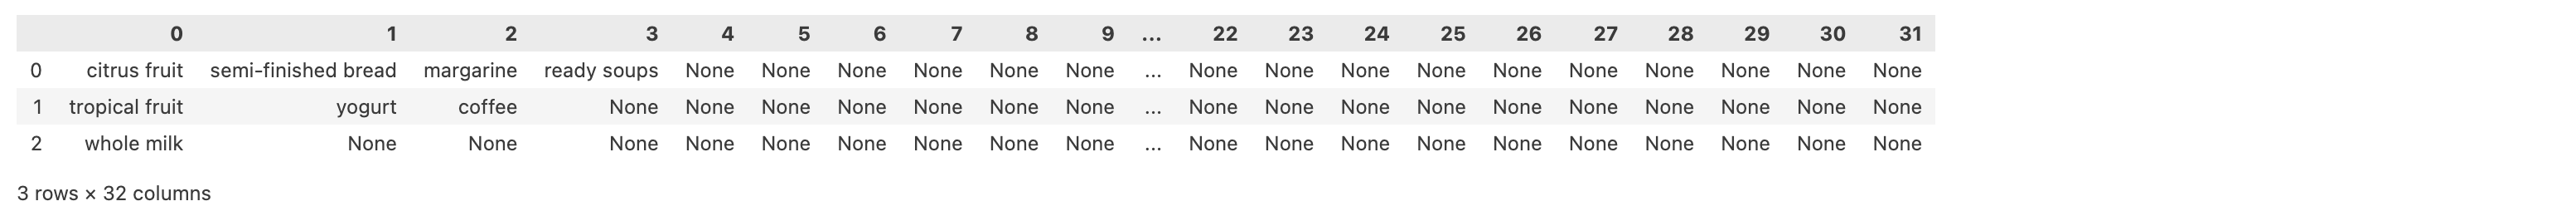

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 다음 단계에서 반복문을 통해 행 단위로 리스트를 만들고, None을 제거하기 위한 작업을 더 간단하게 하기 위해 array로 변환하는 과정을 거칩니다! <strong>
</span>

#### ✅ DataFrame을 **NumPy 배열(array)** 로 변환

In [21]:
df_split_ary = df_split.values
df_split_ary

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], shape=(9835, 32), dtype=object)

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 이제 각 행을 리스트로 바꾸고, None 항목을 제거하여 트랜잭션 리스트 형식의 데이터을 생성합니다! <strong>
</span>

#### ✅ 트랜잭션 데이터 리스트화 및 None 제거

In [22]:
# transaction data 형식에 맞게 None 값 삭제
groceries = []
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    print(temp)
    groceries.append(temp)

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
['tropical fruit', 'yogurt', 'coffee']
['whole milk']
['pip fruit', 'yogurt', 'cream cheese', 'meat spreads']
['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']
['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']
['rolls/buns']
['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)']
['potted plants']
['whole milk', 'cereals']
['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate']
['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes']
['beef']
['frankfurter', 'rolls/buns', 'soda']
['chicken', 'tropical fruit']
['butter', 'sugar', 'fruit/vegetable juice', 'newspapers']
['fruit/vegetable juice']
['packaged fruit/vegetables']
['chocolate']
['specialty bar']
['other vegetables']
['butter milk', 'pastry']
['whole milk']
['tropical fruit', 'cream cheese', 'processed chees

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 지금부터는 실습 ①에서 했던 과정을 반복하게 됩니다! <strong>
</span>

### <span style="color:green"> <strong> 2-2. TransactionEncoder로 이진 행렬로 변환 <strong> </span>

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 기억나시죠?! 알고리즘이 이해하기 위해선 이진 행렬로 변환하는 과정이 필요하고 이는 TransactionEncoder을 통해 가능합니다! <strong>
</span>

In [24]:
# from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
groceries_encoder = te.fit_transform(groceries) # 여기서는 fit_transform을 썼기에 추출과 변환이 동시에!
groceries_tr = pd.DataFrame(groceries_encoder, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


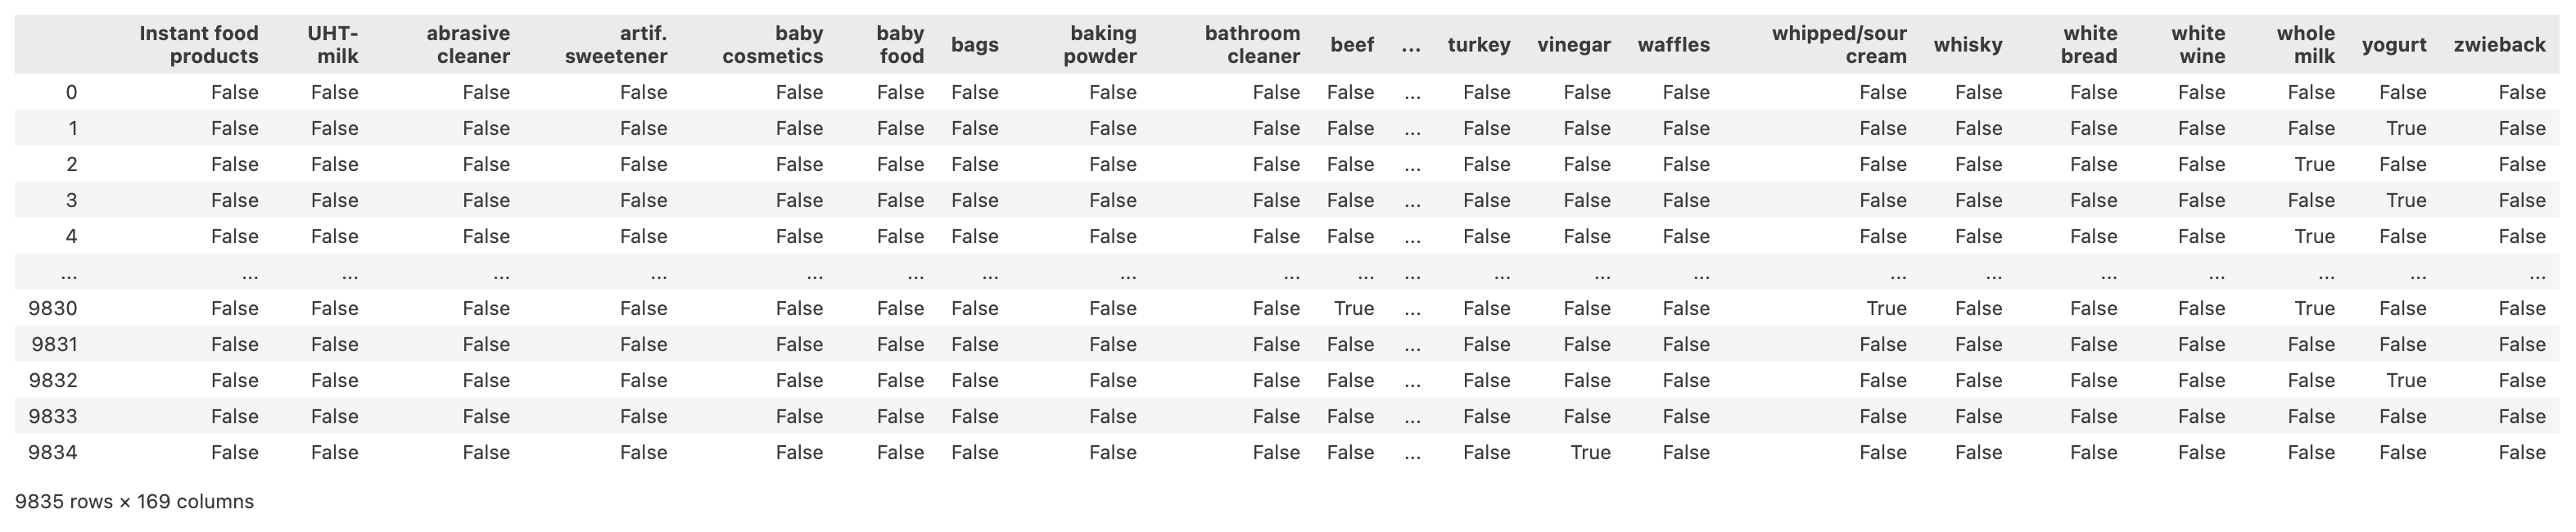

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 Apriori 알고리즘 먼저 사용해보겠습니다! <strong>
</span>

### <span style="color:green"> <strong> 2-3. Apriori 알고리즘 활용한 연관분석 <strong> </span>

#### ✅ Apriori 알고리즘으로 빈발 항목 집합 도출 (지지도 0.05 이상)

In [25]:
from mlxtend.frequent_patterns import apriori

# apriori 알고리즘을 통해 0.05 이상의 지지도를 가진 상품 조합을 추출함
groceries_ap = apriori(groceries_tr, min_support = 00.05, use_colnames = True)
groceries_ap

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


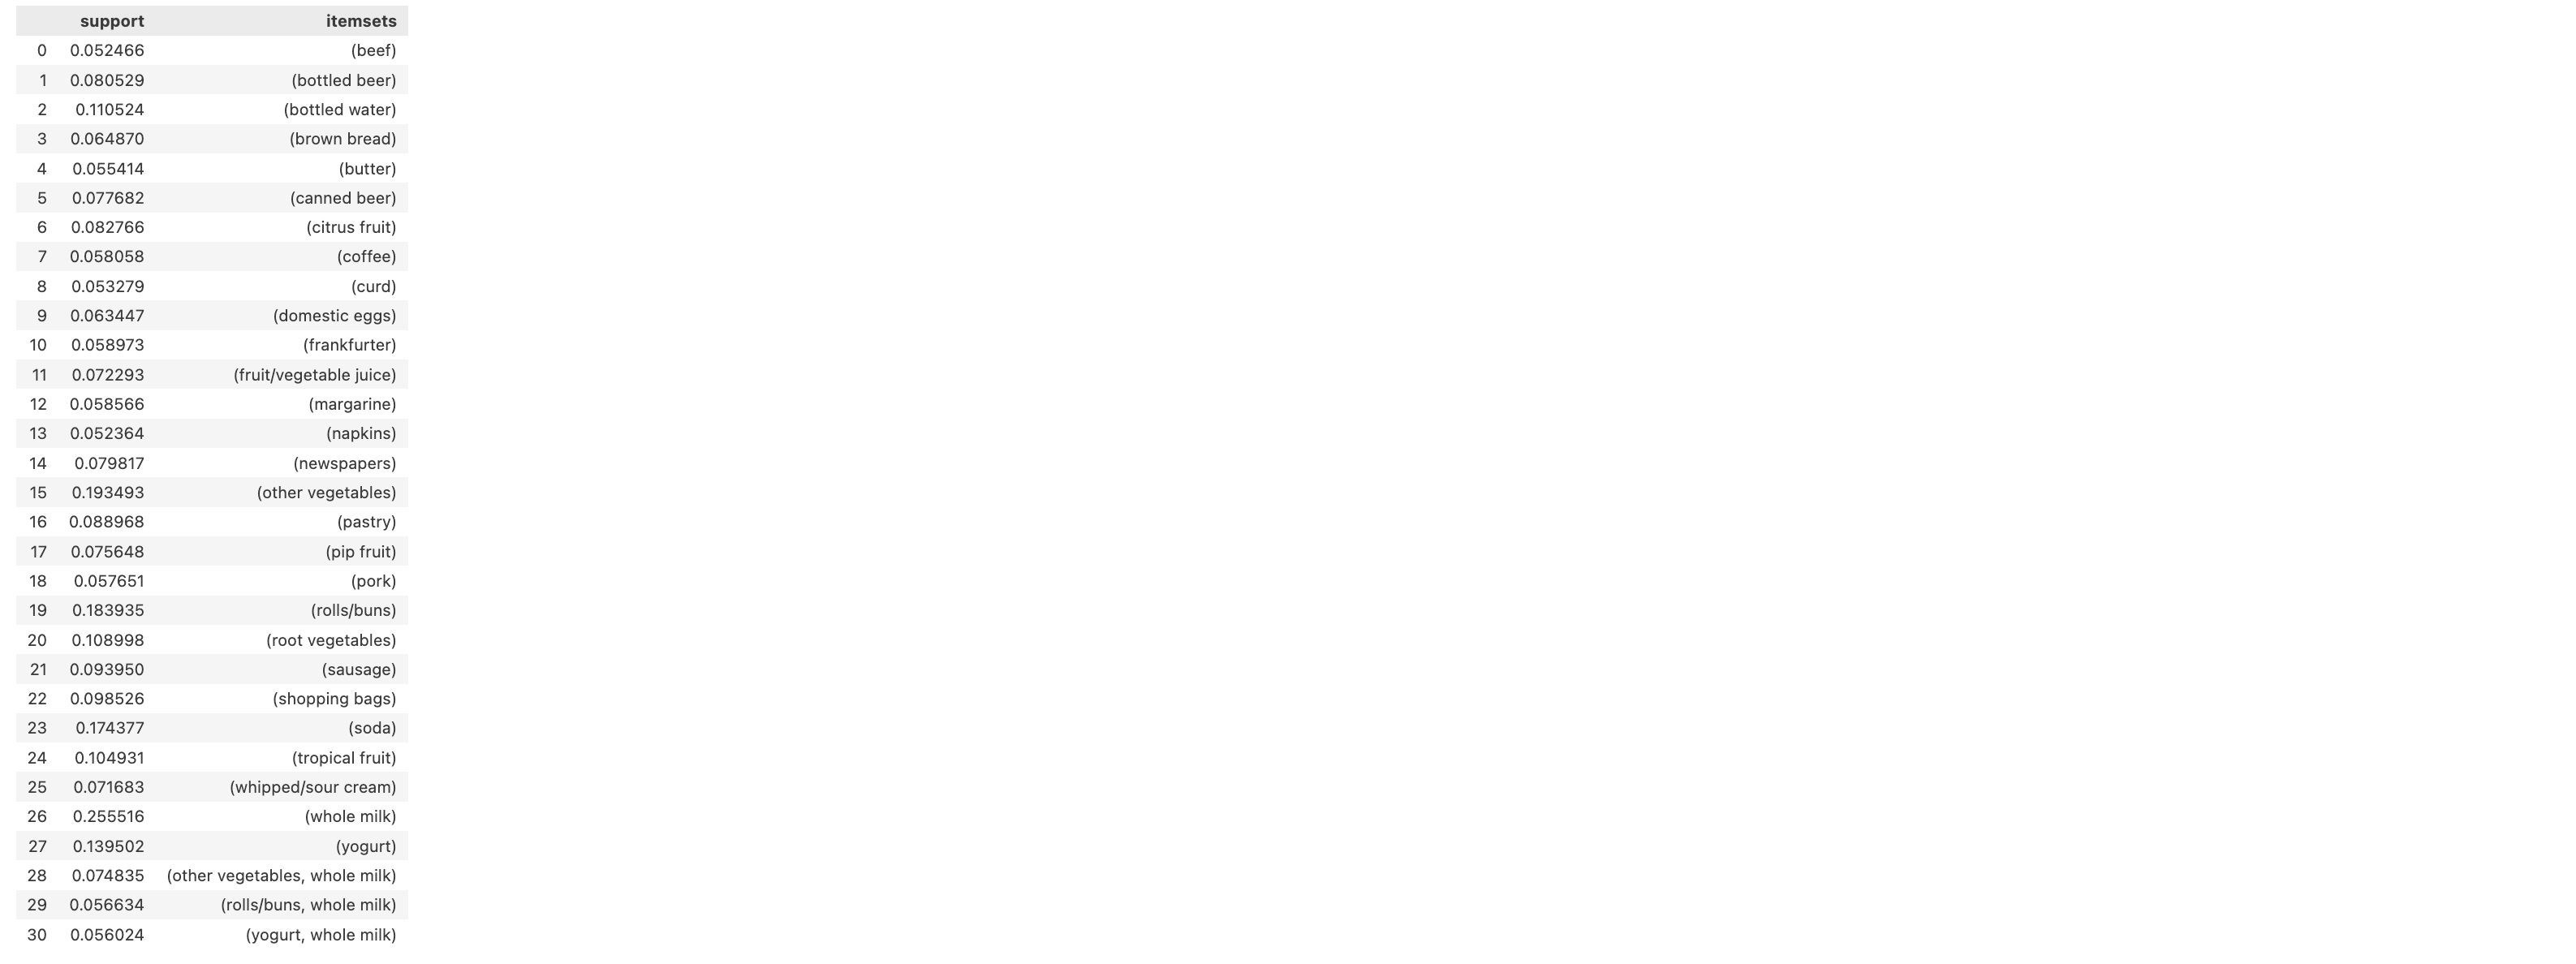

#### ✅ 각 조합의 길이(항목 수)를 추가로 계산

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 단일 아이템 vs 다중 아이템을 구분하거나 강한 조합 선별(ex. 길이가 2 이상이면서 support가 높은 조합은 마케팅적으로 더 유의미함 / 단일 아이템보다 묶음 상품 추천 등 실무 적용성이 높음)을 선별하기 위해 추가로 항목 수를 계산합니다! <strong>
</span>

In [26]:
# 규칙의 길이
groceries_ap['length'] = groceries_ap['itemsets'].apply(lambda x: len(x))
groceries_ap.head()

,support,itemsets,length
0,0.052466,(beef),1
1,0.080529,(bottled beer),1
2,0.110524,(bottled water),1
3,0.064870,(brown bread),1
4,0.055414,(butter),1


#### ✅ `association_rules`로 연관 규칙 도출 및 필터링(신뢰도 0.05 이상)

In [27]:
# association_rules(): apriori 결과를 바탕으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙을 평가
# min_threshold=0.05: 신뢰도 최소 기준을 0.05로 설정
rules = association_rules(groceries_ap, metric="confidence", min_threshold=0.05)

# 생성된 연관 규칙 전체 출력
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432


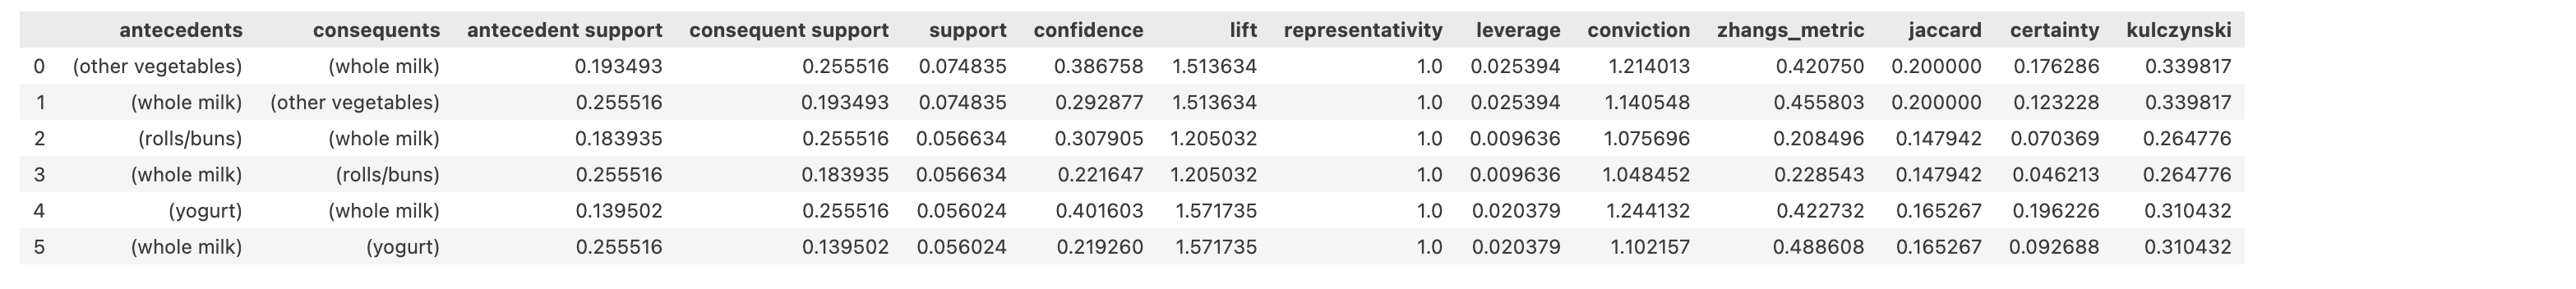

#### ✅ 각 조합의 길이(항목 수)를 컬럼으로 추가

In [28]:
# 각 규칙의 전제조건(antecedents)에 포함된 아이템 수를 계산하여 새로운 열로 추가
# 예: {'milk', 'bread'} → 2
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))

# 다시 규칙 출력 (antecedents_len 포함된 상태로)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_len
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817,1
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817,1
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776,1
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776,1
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432,1
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432,1


#### ✅ 유의미한 연관 규칙 선별(향상도 1 이상)

In [29]:
# 전제 조건의 길이가 1개 이상인 규칙만 필터링 (빈 규칙 제거 목적) -> 실무나 해석상 조건 없는 규칙은 무의미
# confidence > 0.4: 신뢰도가 0.4 초과인 신뢰 가능한 규칙만 선택
# lift > 1: A가 있을 때 B의 발생 가능성이 높아지는 유의미한 관계만 필터링
rules[
    (rules['antecedents_len'] >= 1) & 
    (rules['confidence'] > 0.4) & 
    (rules['lift'] > 1)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_len
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432,1


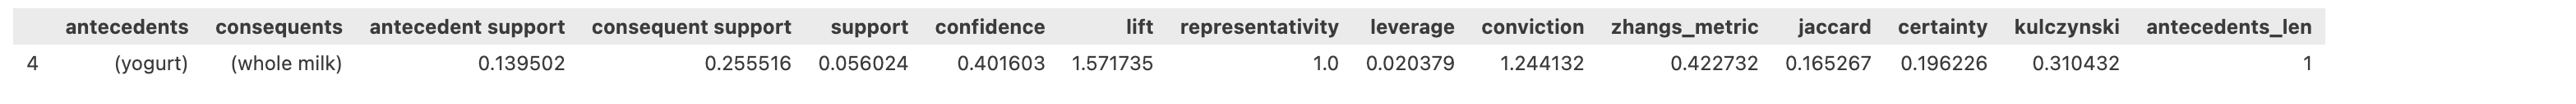

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 결과를 해석해보면 yogurt를 구매한 고객 중 약 40.2%가 whole milk도 함께 구매했으며,
whole milk의 일반 구매율보다 1.57배 더 자주 함께 나타나므로 추천 가치가 있는 연관 규칙이다! <strong>
</span>

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 이제 같은 과정을 FP-Growth 알고리즘을 활용해 분석해봅시다! <strong>
</span>

### <span style="color:green"> <strong> 2-4. FP-Growth 알고리즘 활용한 연관분석 <strong> </span>

#### ✅ fpgrowth 알고리즘으로 빈발 항목 집합 도출 (지지도 0.05 이상)

In [30]:
from mlxtend.frequent_patterns import fpgrowth

# fpgrowth(): FP-Growth 알고리즘을 이용해 빈발 항목 집합 추출
# min_support=0.05: 지지도 0.05 이상인 항목 집합만 추출
# use_colnames=True: 결과 itemsets 열에 항목 이름을 그대로 표시
result = fpgrowth(groceries_tr,min_support=0.05, use_colnames=True)

#### ✅ `association_rules`로 연관 규칙 도출 및 필터링(신뢰도 0.4 이상)

In [31]:
# association_rules(): FP-Growth 결과를 기반으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙 평가
# min_threshold=0.4: 신뢰도 0.4 이상인 규칙만 추출
result_chart = association_rules(result, metric="confidence", min_threshold=0.4)
result_chart

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


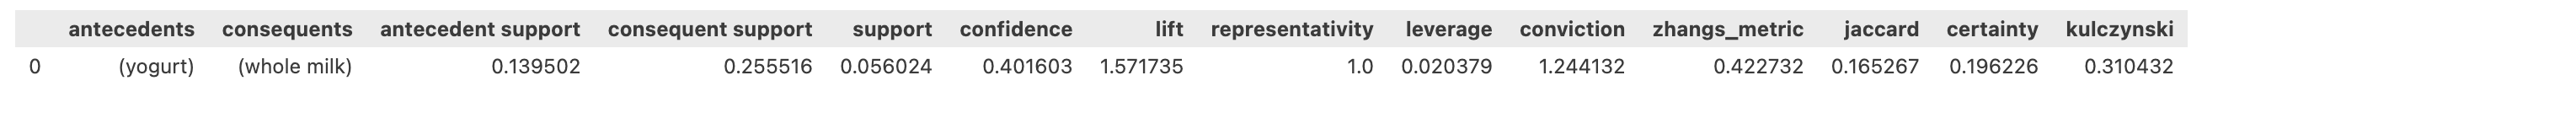

#### ✅ 유의미한 연관 규칙 선별(향상도 1 이상)

In [32]:
# 향상도(lift)가 1 이상인 유의미한 연관 규칙만 필터링
result_chart = result_chart[result_chart['lift'] >= 1]
result_chart

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


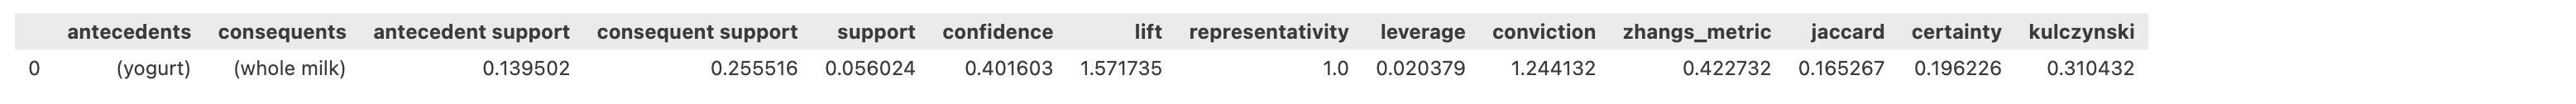

<span style="color:black; background-color:#C6DE9B; padding:2px 4px; border-radius:4px">
<strong> 🤓 결과가 똑같죠?! 그치만 FP-Growth가 더 빠르다는 점! <strong>
</span>

# **🤓 수고하셨습니다~**